# Real-world data in a few minutes with Google Science Journal

**Author:** [Fernando Perez](https://github.com/fperez) ([@fperez_org](https://twitter.com/fperez_org)).

Using an Android phone and Google's new [Science Journal](https://makingscience.withgoogle.com/science-journal/activities) app, it's very easy to collect real-world data. 

The first thing I did was to try their basic light example, using the phone's light sensor. I recorded for a few seconds moving my phone under a lamp, this is what the app shows:

![Google Science Journal App](screenshot.png)
 
Let's see how we can get a bit more detail with just a few lines of code.
 
From within the app, it takes just a couple of taps to export the data to a CSV file and put it on dropbox, from where we can pick it up with the computer and continue our experiments here.

In [1]:
%matplotlib inline
import pandas as pd

Let's have a quick peek at the data, it's always a good idea to do this, to know how to best load it:

In [2]:
fname = "Untitled Experiment Trial 1.csv"
!head "$fname"

timestamp,value
1463893627134,10.0
1463893627209,12.0
1463893627238,12.0
1463893627340,12.0
1463893627441,12.0
1463893627542,12.0
1463893627643,12.0
1463893627743,12.0
1463893627817,10.0


OK, the timestamps look like miliseconds from the epoch.  

For convenience, we'll subtract the first timestamp from all of them to get 0-offset data (basically setting our "laboratory clock" at $t=0$ for data collection).  This is done by the `tc` function below, applied to column 0 in `converters`.

We can also ask Pandas to use the time directly as our data index (`index_col=0`) and we'll name the columns ourselves, by providing the column names and asking it to skip the header (`header=0`):

In [3]:
tc = lambda x: int(x)-1463893627134
df = pd.read_csv(fname, index_col=0, converters={0:tc}, names=["time", "lux"], header=0)
df.head()

,lux
time,
0,10.0
75,12.0
104,12.0
206,12.0
307,12.0


Now let's get some quick summary statistics on the data:

In [4]:
df.describe()

,lux
count,146.000000
mean,1604.424658
std,6590.471272
min,6.000000
25%,8.000000
50%,12.000000
75%,23.000000
max,32767.000000


This already gives us more detail that Google does (cf screenshot above), as we have more precise min/max/average values, as well as extra statistics.

We can also plot the data, but because of the sharp variation in the intensity, the linear scale provided by the app isn't too informative, a log y scale will be much more useful:

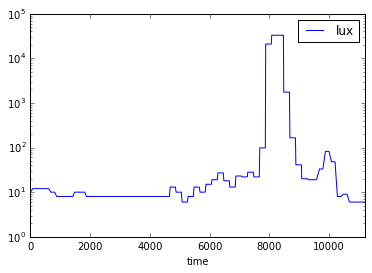

In [5]:
df.plot(logy=True);

This little exercise only took me a few minutes to code up, from installing the app in the first place to having the data loaded and minimally summarized.  While obviously I haven't done anything interesting with this 5-minute proof of concept, I find it exciting that with this app, accessing real-world data that we can then load into Jupyter for more complex analysis has become *incredibly* easy.  Now we should start playing with fun and/or meaningful data and questions...